# Zillow

## acquire & summarize

In [1]:
import numpy as np
import pandas as pd

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:.2f}'.format


# Stats
import scipy.stats as stats

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

#My Files
import env

1. Acquire & summarize
Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

    - Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
    - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.
    - Only include properties that include a latitude and longitude value.

In [2]:
def get_db_url(database):
    from env import host, user, password
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

# acquire zillow data using the query
def get_zillow():
    # SQL Query
    sql = '''

    SELECT prop.*, 
           pred.logerror, 
           pred.transactiondate, 
           air.airconditioningdesc, 
           arch.architecturalstyledesc, 
           build.buildingclassdesc, 
           heat.heatingorsystemdesc, 
           landuse.propertylandusedesc, 
           story.storydesc, 
           construct.typeconstructiondesc 
    FROM   properties_2017 prop  
           INNER JOIN (SELECT parcelid,
                       Max(transactiondate) transactiondate 
                       FROM   predictions_2017 
  
                       GROUP  BY parcelid) pred 
                   USING (parcelid)
                   
                            JOIN predictions_2017 as pred USING (parcelid, transactiondate)
           LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
           LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
           LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
           LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
           LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
           LEFT JOIN storytype story USING (storytypeid) 
           LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
    WHERE  prop.latitude IS NOT NULL 
           AND prop.longitude IS NOT NULL
           AND pred.id IN (SELECT MAX(id)
           FROM predictions_2017
           GROUP BY parcelid
           HAVING MAX(transactiondate));
       
       
'''
    url = get_db_url('zillow')
    zillow_df = pd.read_sql(sql, url, index_col='id')
    return zillow_df


In [3]:
zillow_df = get_zillow()

In [4]:
zillow_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
id,,,,,,,,,,,,,,,,,,,,,
1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,NaN,...,60590630072012.00,0.03,2017-01-01,None,None,None,None,Single Family Residential,None,None
1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,NaN,...,61110010023006.00,0.06,2017-01-01,None,None,None,None,Single Family Residential,None,None
11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,NaN,...,60590218022012.00,0.01,2017-01-01,None,None,None,None,Single Family Residential,None,None
2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,NaN,...,60373001001006.00,-0.10,2017-01-01,None,None,None,Central,Single Family Residential,None,None
1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,NaN,...,60371236012000.00,0.01,2017-01-01,Central,None,None,Central,Condominium,None,None


In [6]:
# get data from SQl and save as csv locally

# df = get_zillow()
# df.to_csv("zillow.csv")

In [7]:
# read the previously saved csv file

zillow_df = pd.read_csv("zillow.csv")

2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [8]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77381 entries, 0 to 77380
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77381 non-null  int64  
 1   parcelid                      77381 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77381 non-null  float64
 6   bedroomcnt                    77381 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49672 non-null  float64
 9   calculatedbathnbr             76772 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77185 non-null  float64
 13  f

In [9]:
zillow_df.dtypes

id                            int64
parcelid                      int64
airconditioningtypeid       float64
architecturalstyletypeid    float64
basementsqft                float64
                             ...   
buildingclassdesc            object
heatingorsystemdesc          object
propertylandusedesc          object
storydesc                    object
typeconstructiondesc         object
Length: 68, dtype: object

In [10]:
zillow_df.shape

(77381, 68)

In [11]:
# zillow_df.value_counts()

In [12]:
#zillow_df.hist()
#plt.tight_layout();

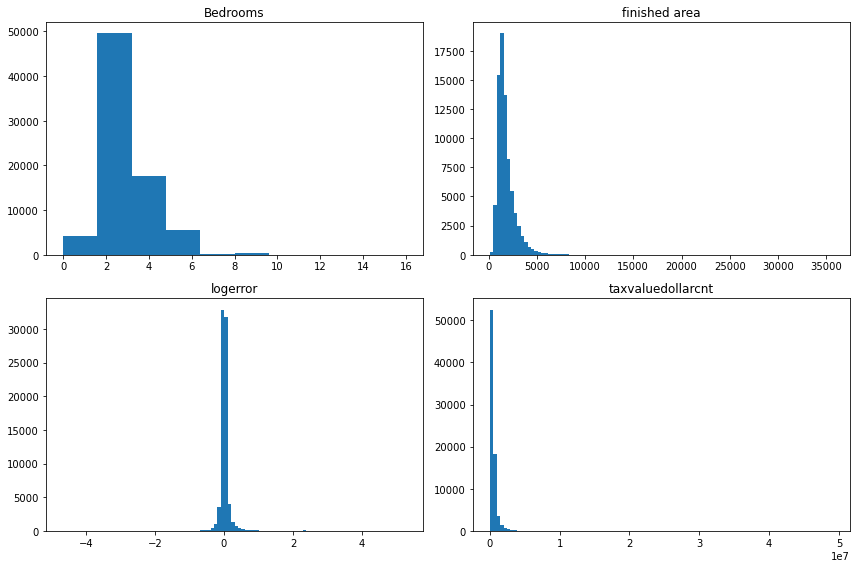

In [13]:
# plot some distributions 

plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(zillow_df.bedroomcnt, bins = 10)
plt.title('Bedrooms')



plt.subplot(222)
plt.hist(zillow_df.calculatedfinishedsquarefeet, bins = 100)
plt.title('finished area')



plt.subplot(223)
plt.hist(zillow_df.logerror, bins = 100)
plt.title('logerror')



plt.subplot(224)
plt.hist(zillow_df.taxvaluedollarcnt, bins = 100)
plt.title('taxvaluedollarcnt')

plt.tight_layout();

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [14]:
# How many nulls have in each row?
zillow_df.isnull().sum(axis =1).value_counts()

33    14782
34    13327
32    12579
31     9891
36     5775
29     5270
35     5148
37     3620
30     3455
38     1925
28      455
27      316
39      285
40      230
44       78
26       65
45       50
41       29
43       28
25       24
42       23
24       13
46        5
47        3
48        3
23        2
dtype: int64

In [15]:
def nulls_by_col(df):
    # returns number of nulls for each column
    num_missing = df.isnull().sum()
    # returns the number of rows in df
    rows = df.shape[0]
    # returns the percent of rows mission
    prcnt_miss = num_missing / rows * 100
    # create columns
    cols_missing = pd.DataFrame({'num_rows_missing': num_missing, 'pet_rows_missing': prcnt_miss})
    return cols_missing

In [16]:
nulls_by_col(zillow_df)

,num_rows_missing,pet_rows_missing
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,52428,67.75
architecturalstyletypeid,77175,99.73
basementsqft,77331,99.94
...,...,...
buildingclassdesc,77366,99.98
heatingorsystemdesc,27941,36.11
propertylandusedesc,0,0.00
storydesc,77331,99.94


4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [17]:
# How many nulls have in each column?
# zillow_df.isnull().sum()

In [18]:
def nulls_by_row(df):
    num_missing = df.isnull().sum(axis=1)
    prcnt_miss = num_missing / df.shape[1] * 100
    rows_missing = pd.DataFrame({'num_cols_missing': num_missing, 'pct_cols_missing': prcnt_miss})\
    .reset_index()\
    .groupby(['num_cols_missing', 'pct_cols_missing']).count()\
    .rename(index=str, columns={'id': 'num_rows'}).reset_index()
    return rows_missing

In [19]:
nulls_by_row(zillow_df)

,num_cols_missing,pct_cols_missing,index
0,23,33.82352941176471,2
1,24,35.294117647058826,13
2,25,36.76470588235294,24
3,26,38.23529411764706,65
4,27,39.705882352941174,316
5,28,41.17647058823529,455
6,29,42.64705882352941,5270
7,30,44.11764705882353,3455
8,31,45.588235294117645,9891
9,32,47.05882352941176,12579


In [20]:
# cool code that provides a summary of the df provided
# Requires nulls_by_col & nulls_by_row

def summarize(df):
    '''
    summarize will take in a single argument (a pandas dataframe) 
    and output to console various statistics on said dataframe, including:
    # .head()
    # .info()
    # .describe()
    # value_counts()
    # observation of nulls in the dataframe
    '''
    print('=====================================================')
    print('Dataframe head: ')
    print(df.head(3))
    print('=====================================================')
    print('Dataframe info: ')
    print(df.info())
    print('=====================================================')
    print('Dataframe Description: ')
    print(df.describe())
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    cat_cols = [col for col in df.columns if col not in num_cols]
    print('=====================================================')
    print('DataFrame value counts: ')
    for col in df.columns:
        if col in cat_cols:
            print(df[col].value_counts())
        else:
            print(df[col].value_counts(bins=10, sort=False))
    print('=====================================================')
    print('nulls in dataframe by column: ')
    print(nulls_by_col(df))
    print('=====================================================')
    print('nulls in dataframe by row: ')
    print(nulls_by_row(df))
    print('=====================================================')

In [21]:
# summarize(zillow_df)

## prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [22]:
zillow_df.propertylandusedesc.sample(50)

28230            Single Family Residential
48453            Single Family Residential
65819                         Cluster Home
19261                          Condominium
73108                          Condominium
64189                          Condominium
13897            Single Family Residential
26007            Single Family Residential
74564    Duplex (2 Units, Any Combination)
32179            Single Family Residential
57660    Duplex (2 Units, Any Combination)
77195            Single Family Residential
56747            Single Family Residential
16892            Single Family Residential
38605            Single Family Residential
60066                          Condominium
44412            Single Family Residential
48011            Single Family Residential
59594            Single Family Residential
10319            Single Family Residential
74346                          Condominium
40959            Single Family Residential
61074            Single Family Residential
60799      

In [23]:
# propertylandusedesc == Single Family Residential
is_single_fam = zillow_df['propertylandusedesc']== 'Single Family Residential'
print(is_single_fam.head())

0     True
1     True
2     True
3     True
4    False
Name: propertylandusedesc, dtype: bool


In [24]:
# unitcnt == 1
zillow_unitcnt1 = zillow_df['unitcnt']== 1
print(zillow_unitcnt1.head())

0    False
1    False
2    False
3     True
4     True
Name: unitcnt, dtype: bool


In [25]:
# new df where propertylandusedesc == Single Family Residential
zillow_single_unit = zillow_df[is_single_fam]

In [26]:
zillow_single_unit.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,60590630072012.00,0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,61110010023006.00,0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,60590218022012.00,0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,60373001001006.00,-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
6,781532,12095076,1.00,NaN,NaN,3.00,4.00,NaN,9.00,3.00,...,60374608001014.00,-0.00,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [27]:
zillow_single_unit.shape

(52320, 68)

In [28]:
# new df where unitcnt == 1
zillow_unitcnt1 = zillow_df[zillow_unitcnt1]

In [29]:
zillow_unitcnt1.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,60373001001006.00,-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.00,NaN,NaN,3.00,3.00,NaN,8.00,3.00,...,60371236012000.00,0.01,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN
6,781532,12095076,1.00,NaN,NaN,3.00,4.00,NaN,9.00,3.00,...,60374608001014.00,-0.00,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN
7,870991,12069064,NaN,NaN,NaN,1.00,2.00,NaN,5.00,1.00,...,60373020041001.00,0.10,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
8,1246926,12790562,NaN,NaN,NaN,3.00,4.00,NaN,9.00,3.00,...,60375002024006.00,-0.04,2017-01-02,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [30]:
zillow_unitcnt1.shape

(47293, 68)

In [31]:
# propertylandusetypeid that can be considered "single unit"
single_unit = [261, 262, 263, 264, 268, 273, 275, 276, 279]

In [32]:
# new df where propertylandusetypeid in single_unit
new_single_unit = zillow_df[zillow_df.propertylandusetypeid.isin(single_unit)]

In [33]:
new_single_unit.shape

(52458, 68)

In [34]:
# df with bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet > 0
new_single_unit = new_single_unit[(new_single_unit.bedroomcnt > 0) & (new_single_unit.bathroomcnt > 0) & (new_single_unit.calculatedfinishedsquarefeet>0)]

In [35]:
new_single_unit.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.50,4.00,NaN,NaN,3.50,...,60590630072012.00,0.03,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.00,2.00,NaN,NaN,1.00,...,61110010023006.00,0.06,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.00,3.00,NaN,NaN,2.00,...,60590218022012.00,0.01,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.00,4.00,NaN,8.00,3.00,...,60373001001006.00,-0.10,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
6,781532,12095076,1.00,NaN,NaN,3.00,4.00,NaN,9.00,3.00,...,60374608001014.00,-0.00,2017-01-01,Central,NaN,NaN,Central,Single Family Residential,NaN,NaN


In [36]:
new_single_unit.shape

(52261, 68)

In [37]:
single_unit = new_single_unit

In [38]:
single_unit.shape

(52261, 68)

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

- The input:
    - A dataframe
    - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
    - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
- The output:
    - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
- hint:
    - Look up the dropna documentation.
    - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
    - Make use of inplace, i.e. inplace=True/False.

In [39]:
def handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5):
    ''' function which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(prop_required_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(prop_required_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df



In [40]:
single_unit = handle_missing_values(single_unit, prop_required_row = 0.5, prop_required_col = 0.5)
single_unit.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc
0,1727539,14297519,3.50,4.00,NaN,3.50,3100.00,3100.00,6059.00,3.00,...,485713.00,1023282.00,2016.00,537569.00,11013.72,60590630072012.00,0.03,2017-01-01,NaN,Single Family Residential
1,1387261,17052889,1.00,2.00,NaN,1.00,1465.00,1465.00,6111.00,1.00,...,88000.00,464000.00,2016.00,376000.00,5672.48,61110010023006.00,0.06,2017-01-01,NaN,Single Family Residential
2,11677,14186244,2.00,3.00,NaN,2.00,1243.00,1243.00,6059.00,2.00,...,85289.00,564778.00,2016.00,479489.00,6488.30,60590218022012.00,0.01,2017-01-01,NaN,Single Family Residential
3,2288172,12177905,3.00,4.00,8.00,3.00,2376.00,2376.00,6037.00,3.00,...,108918.00,145143.00,2016.00,36225.00,1777.51,60373001001006.00,-0.10,2017-01-01,Central,Single Family Residential
6,781532,12095076,3.00,4.00,9.00,3.00,2962.00,2962.00,6037.00,3.00,...,276684.00,773303.00,2016.00,496619.00,9516.26,60374608001014.00,-0.00,2017-01-01,Central,Single Family Residential


In [41]:
single_unit.shape

(52261, 34)

In [42]:
single_unit.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 52261 entries, 0 to 77380
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52261 non-null  int64  
 1   parcelid                      52261 non-null  int64  
 2   bathroomcnt                   52261 non-null  float64
 3   bedroomcnt                    52261 non-null  float64
 4   buildingqualitytypeid         33685 non-null  float64
 5   calculatedbathnbr             52246 non-null  float64
 6   calculatedfinishedsquarefeet  52261 non-null  float64
 7   finishedsquarefeet12          52077 non-null  float64
 8   fips                          52261 non-null  float64
 9   fullbathcnt                   52246 non-null  float64
 10  heatingorsystemtypeid         33830 non-null  float64
 11  latitude                      52261 non-null  float64
 12  longitude                     52261 non-null  float64
 13  l

3. Decide how to handle the remaining missing values:

- Fill with constant value.
- Impute with mean, median, mode.
- Drop row/column

In [43]:
# check nulls
single_unit.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18576
calculatedbathnbr                  15
calculatedfinishedsquarefeet        0
finishedsquarefeet12              184
fips                                0
fullbathcnt                        15
heatingorsystemtypeid           18431
latitude                            0
longitude                           0
lotsizesquarefeet                 360
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              18514
rawcensustractandblock              0
regionidcity                     1028
regionidcounty                      0
regionidzip                        24
roomcnt                             0
unitcnt                         18485
yearbuilt                          33
structuretaxvaluedollarcnt         72
taxvaluedollarcnt                   1
assessmentye

In [44]:
# drop unnecessary columns
dropcols = ['calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid', 'propertyzoningdesc', 'censustractandblock']

single_unit = single_unit.drop(columns=dropcols)
single_unit.isnull().sum()


id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18576
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                 360
propertycountylandusecode           0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                     1028
regionidcounty                      0
regionidzip                        24
roomcnt                             0
unitcnt                         18485
yearbuilt                          33
structuretaxvaluedollarcnt         72
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           4
logerror                            0
transactiondate                     0
heatingorsys

In [45]:
# drop null rows for specific columns only

single_unit = single_unit[single_unit.regionidzip.notnull()]
single_unit = single_unit[single_unit.yearbuilt.notnull()]
single_unit = single_unit[single_unit.structuretaxvaluedollarcnt.notnull()]
single_unit = single_unit[single_unit.taxvaluedollarcnt.notnull()]
single_unit = single_unit[single_unit.landtaxvaluedollarcnt.notnull()]
single_unit = single_unit[single_unit.taxamount.notnull()]


single_unit.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18529
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                 336
propertycountylandusecode           0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                     1003
regionidcounty                      0
regionidzip                         0
roomcnt                             0
unitcnt                         18442
yearbuilt                           0
structuretaxvaluedollarcnt          0
taxvaluedollarcnt                   0
assessmentyear                      0
landtaxvaluedollarcnt               0
taxamount                           0
logerror                            0
transactiondate                     0
heatingorsys

In [46]:
# most frequent value for buildingqualitytypeid
single_unit.buildingqualitytypeid.value_counts()/len(single_unit)*100

6.00    19.68
8.00    15.80
4.00    15.53
7.00     6.58
5.00     2.86
9.00     2.14
11.00    0.99
10.00    0.43
3.00     0.28
12.00    0.16
1.00     0.02
2.00     0.01
Name: buildingqualitytypeid, dtype: float64

In [47]:
# Fill NaNs with mode

single_unit.buildingqualitytypeid.mode()[0]

single_unit['buildingqualitytypeid'] = single_unit.buildingqualitytypeid.fillna(single_unit.buildingqualitytypeid.mode()[0])

In [48]:
single_unit.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                 336
propertycountylandusecode           0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                     1003
regionidcounty                      0
regionidzip                         0
roomcnt                             0
unitcnt                         18442
yearbuilt                           0
structuretaxvaluedollarcnt          0
taxvaluedollarcnt                   0
assessmentyear                      0
landtaxvaluedollarcnt               0
taxamount                           0
logerror                            0
transactiondate                     0
heatingorsys

In [49]:
# Fill NaNs with mode

single_unit.lotsizesquarefeet.mode()[0]

single_unit['lotsizesquarefeet'] = single_unit.lotsizesquarefeet.fillna(single_unit.lotsizesquarefeet.mode()[0])



In [50]:
single_unit.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                   0
propertycountylandusecode           0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                     1003
regionidcounty                      0
regionidzip                         0
roomcnt                             0
unitcnt                         18442
yearbuilt                           0
structuretaxvaluedollarcnt          0
taxvaluedollarcnt                   0
assessmentyear                      0
landtaxvaluedollarcnt               0
taxamount                           0
logerror                            0
transactiondate                     0
heatingorsys

In [51]:
single_unit.unitcnt.fillna(1, inplace = True)
    

In [52]:
single_unit.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid               0
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                   0
propertycountylandusecode           0
propertylandusetypeid               0
rawcensustractandblock              0
regionidcity                     1003
regionidcounty                      0
regionidzip                         0
roomcnt                             0
unitcnt                             0
yearbuilt                           0
structuretaxvaluedollarcnt          0
taxvaluedollarcnt                   0
assessmentyear                      0
landtaxvaluedollarcnt               0
taxamount                           0
logerror                            0
transactiondate                     0
heatingorsys

In [53]:
# heatingorsystemdes fill NULLS with nine since it prob means they didn't have any (southern CA)
single_unit.heatingorsystemdesc.fillna('None', inplace = True)

# can also probably drop this column
# note from review: ventura county had NAN for all of heatingorsystemdes so may not be helpful to keep in since ventura may not report that value

In [54]:
single_unit.isnull().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
buildingqualitytypeid              0
calculatedfinishedsquarefeet       0
fips                               0
latitude                           0
longitude                          0
lotsizesquarefeet                  0
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1003
regionidcounty                     0
regionidzip                        0
roomcnt                            0
unitcnt                            0
yearbuilt                          0
structuretaxvaluedollarcnt         0
taxvaluedollarcnt                  0
assessmentyear                     0
landtaxvaluedollarcnt              0
taxamount                          0
logerror                           0
transactiondate                    0
heatingorsystemdesc                0
p

In [55]:
# Fill NaNs with mode

single_unit.regionidcity.mode()[0]

single_unit['regionidcity'] = single_unit.regionidcity.fillna(single_unit.regionidcity.mode()[0])



In [56]:
single_unit.isnull().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
dtype: int64

No more NULLS

In [57]:
# crete column called county that lsts column type based on fips
single_unit['county'] = single_unit['fips'].apply(
    lambda x: 'Los Angeles' if x == 6037\
    else 'Orange' if x == 6059\
    else 'Ventura')

In [58]:
single_unit.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,propertylandusedesc,county
0,1727539,14297519,3.50,4.00,6.00,3100.00,6059.00,33634931.00,-117869207.00,4506.00,...,485713.00,1023282.00,2016.00,537569.00,11013.72,0.03,2017-01-01,None,Single Family Residential,Orange
1,1387261,17052889,1.00,2.00,6.00,1465.00,6111.00,34449266.00,-119281531.00,12647.00,...,88000.00,464000.00,2016.00,376000.00,5672.48,0.06,2017-01-01,None,Single Family Residential,Ventura
2,11677,14186244,2.00,3.00,6.00,1243.00,6059.00,33886168.00,-117823170.00,8432.00,...,85289.00,564778.00,2016.00,479489.00,6488.30,0.01,2017-01-01,None,Single Family Residential,Orange
3,2288172,12177905,3.00,4.00,8.00,2376.00,6037.00,34245180.00,-118240722.00,13038.00,...,108918.00,145143.00,2016.00,36225.00,1777.51,-0.10,2017-01-01,Central,Single Family Residential,Los Angeles
6,781532,12095076,3.00,4.00,9.00,2962.00,6037.00,34145202.00,-118179824.00,63000.00,...,276684.00,773303.00,2016.00,496619.00,9516.26,-0.00,2017-01-01,Central,Single Family Residential,Los Angeles


In [59]:
single_unit.isnull().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
propertylandusedesc             0
county                          0
dtype: int64

In [60]:
# drop the rest of the unnecessary columns
dropcols = ['propertycountylandusecode', 'propertylandusetypeid', 'propertylandusedesc', 'unitcnt']

single_unit = single_unit.drop(columns=dropcols)
single_unit


,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc,county
0,1727539,14297519,3.50,4.00,6.00,3100.00,6059.00,33634931.00,-117869207.00,4506.00,...,1998.00,485713.00,1023282.00,2016.00,537569.00,11013.72,0.03,2017-01-01,None,Orange
1,1387261,17052889,1.00,2.00,6.00,1465.00,6111.00,34449266.00,-119281531.00,12647.00,...,1967.00,88000.00,464000.00,2016.00,376000.00,5672.48,0.06,2017-01-01,None,Ventura
2,11677,14186244,2.00,3.00,6.00,1243.00,6059.00,33886168.00,-117823170.00,8432.00,...,1962.00,85289.00,564778.00,2016.00,479489.00,6488.30,0.01,2017-01-01,None,Orange
3,2288172,12177905,3.00,4.00,8.00,2376.00,6037.00,34245180.00,-118240722.00,13038.00,...,1970.00,108918.00,145143.00,2016.00,36225.00,1777.51,-0.10,2017-01-01,Central,Los Angeles
6,781532,12095076,3.00,4.00,9.00,2962.00,6037.00,34145202.00,-118179824.00,63000.00,...,1950.00,276684.00,773303.00,2016.00,496619.00,9516.26,-0.00,2017-01-01,Central,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77376,673515,11000655,2.00,2.00,6.00,1286.00,6037.00,34245368.00,-118282383.00,47405.00,...,1940.00,70917.00,354621.00,2016.00,283704.00,4478.43,0.02,2017-09-20,Central,Los Angeles
77377,2968375,17239384,2.00,4.00,6.00,1612.00,6111.00,34300140.00,-118706327.00,12105.00,...,1964.00,50683.00,67205.00,2016.00,16522.00,1107.48,0.01,2017-09-21,None,Ventura
77378,1843709,12773139,1.00,3.00,4.00,1032.00,6037.00,34040895.00,-118038169.00,5074.00,...,1954.00,32797.00,49546.00,2016.00,16749.00,876.43,0.04,2017-09-21,Central,Los Angeles
77379,1187175,12826780,2.00,3.00,6.00,1762.00,6037.00,33937685.00,-117996709.00,6347.00,...,1955.00,140000.00,522000.00,2016.00,382000.00,6317.15,0.01,2017-09-25,Central,Los Angeles


<AxesSubplot:ylabel='taxvaluedollarcnt'>

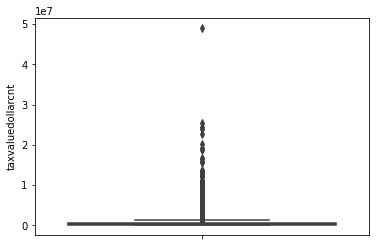

In [61]:
# check for outliers

# plt.subplot(221)
sns.boxplot(y = 'taxvaluedollarcnt', data = single_unit)

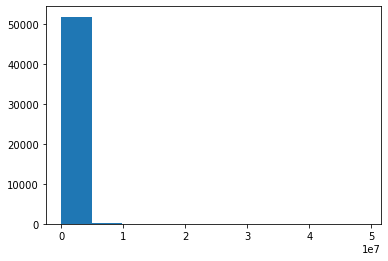

In [62]:
#Histograms for taxvalue of properties

plt.hist(single_unit.taxvaluedollarcnt);

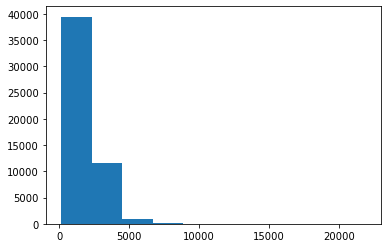

In [63]:
#Histograms for covered sq ft of properties

plt.hist(single_unit.calculatedfinishedsquarefeet);

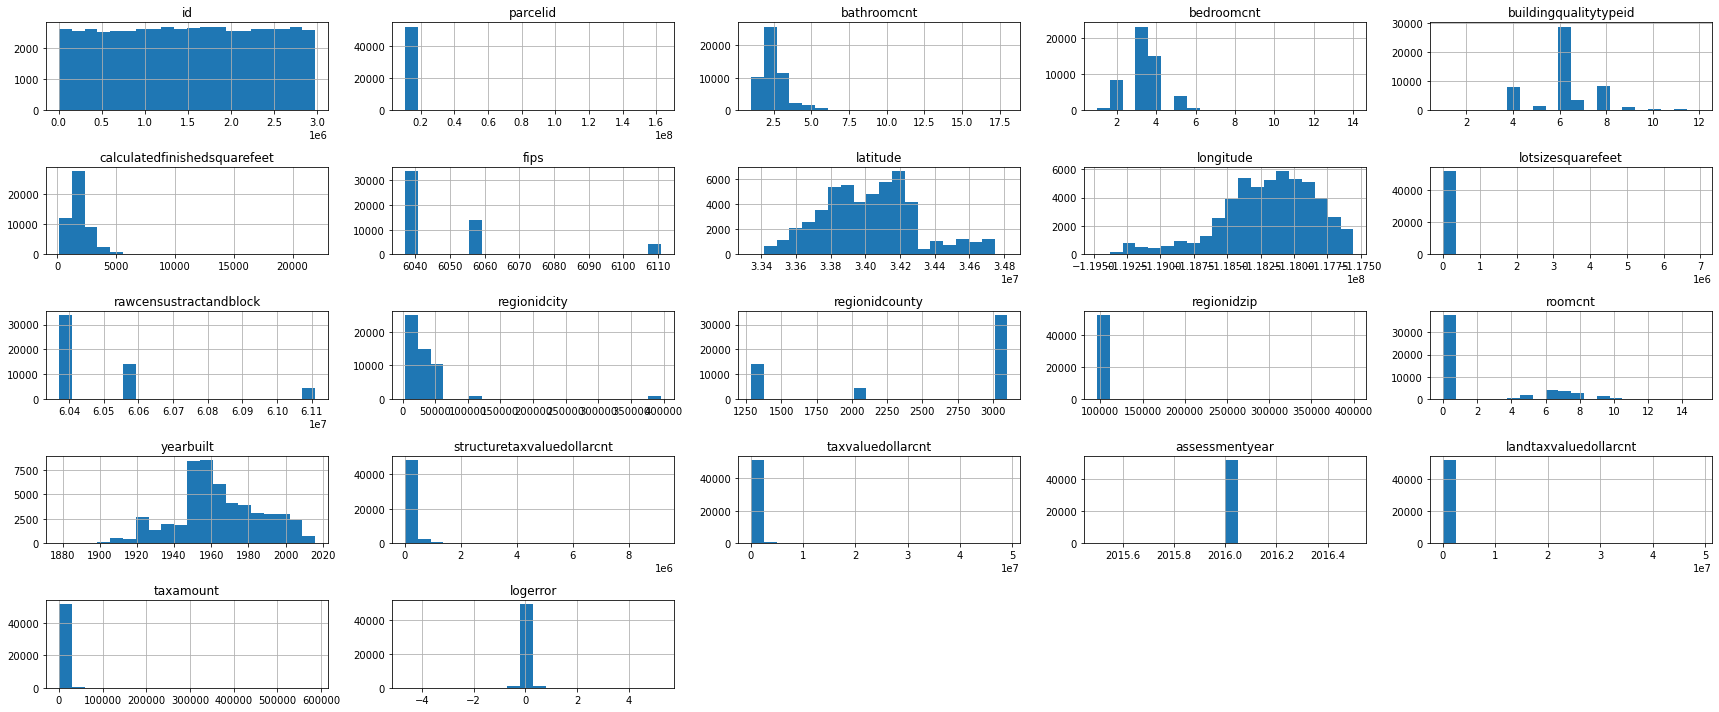

In [64]:
# look at distributions for all columns

single_unit.hist(figsize=(24, 10), bins=20)
plt.tight_layout();


In [65]:
# Remove properties valued more than 5 million dollars

single_unit = single_unit[single_unit.taxvaluedollarcnt < 5_000_000]
single_unit.shape

(51945, 25)

In [66]:
# Remove properties valued more than 8000 square feet

single_unit[single_unit.calculatedfinishedsquarefeet < 8000]
single_unit.shape

(51945, 25)

### wrangle_zillow.py
Functions of the work above needed to acquire and prepare a new sample of data.

In [98]:
def wrangle_zillow():
    # read saved .csv
    df = pd.read_csv('zillow.csv')
    
    # propertylandusetypeid that can be considered "single unit" to df
    single_unit = [261, 262, 263, 264, 268, 273, 275, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_unit)]
    
    # df with bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet > 0
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & (df.calculatedfinishedsquarefeet>0)]

    
    # drop missing values based on a threshold
    df = handle_missing_values(df)
   
    # drop unnecessary columns
    df = df.drop(columns=['calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid', 'propertyzoningdesc', 'censustractandblock','propertycountylandusecode', 'propertylandusetypeid', 'propertylandusedesc', 'unitcnt','heatingorsystemdesc'])
    
    # drop null rows for specific columns only
    df = df[df.regionidzip.notnull()]
    df = df[df.yearbuilt.notnull()]
    df = df[df.structuretaxvaluedollarcnt.notnull()]
    df = df[df.taxvaluedollarcnt.notnull()]
    df = df[df.landtaxvaluedollarcnt.notnull()]
    df = df[df.taxamount.notnull()]

    # fill NaNs with mode
    df.buildingqualitytypeid.mode()[0]
    df['buildingqualitytypeid'] = df.buildingqualitytypeid.fillna(df.buildingqualitytypeid.mode()[0])
    df.lotsizesquarefeet.mode()[0]
    df['lotsizesquarefeet'] = df.lotsizesquarefeet.fillna(df.lotsizesquarefeet.mode()[0])
    df.regionidcity.mode()[0]
    df['regionidcity'] = df.regionidcity.fillna(df.regionidcity.mode()[0])

    
    # crete column called county that lists column type based on fips
    df['county'] = df['fips'].apply(
    lambda x: 'Los Angeles' if x == 6037\
    else 'Orange' if x == 6059\
    else 'Ventura')
    
    # check for outliers
    df = df[df.taxvaluedollarcnt < 5_000_000]
    df[df.calculatedfinishedsquarefeet < 8000]
    
    
    # drop nulls to make sure none were missed
    df = df.dropna()
    
    return df
    


In [99]:
df = wrangle_zillow()
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,1727539,14297519,3.50,4.00,6.00,3100.00,6059.00,33634931.00,-117869207.00,4506.00,...,0.00,1998.00,485713.00,1023282.00,2016.00,537569.00,11013.72,0.03,2017-01-01,Orange
1,1387261,17052889,1.00,2.00,6.00,1465.00,6111.00,34449266.00,-119281531.00,12647.00,...,5.00,1967.00,88000.00,464000.00,2016.00,376000.00,5672.48,0.06,2017-01-01,Ventura
2,11677,14186244,2.00,3.00,6.00,1243.00,6059.00,33886168.00,-117823170.00,8432.00,...,6.00,1962.00,85289.00,564778.00,2016.00,479489.00,6488.30,0.01,2017-01-01,Orange
3,2288172,12177905,3.00,4.00,8.00,2376.00,6037.00,34245180.00,-118240722.00,13038.00,...,0.00,1970.00,108918.00,145143.00,2016.00,36225.00,1777.51,-0.10,2017-01-01,Los Angeles
6,781532,12095076,3.00,4.00,9.00,2962.00,6037.00,34145202.00,-118179824.00,63000.00,...,0.00,1950.00,276684.00,773303.00,2016.00,496619.00,9516.26,-0.00,2017-01-01,Los Angeles


In [89]:
df.shape

(51945, 24)